In [1]:
from pca_utils import *
from pca_mips import *

In [2]:
def generate_data(
    num_atoms: int = 10**3,
    len_signal: int = 10**4,
    num_signals: int = 1,
    num_best_atoms: int =5,
    seed: int = 0,
) -> Tuple[np.ndarray, np.ndarray]:

	
    rng = np.random.default_rng(seed)
    atoms_array = np.empty((num_atoms, len_signal))
    means = rng.normal(size=num_atoms)
    atoms_array = np.empty((num_atoms, len_signal))
    for idx in range(num_atoms):
      atoms_array[idx] = rng.normal(loc=means[idx], size=len_signal)
    signal = rng.normal(loc=rng.normal(), size=(num_signals, len_signal))
    if num_signals == 1:
        signal = signal.reshape(1,-1)

    return atoms_array, signal




In [6]:
def sample_complexity(dimension):
    delta = 2  # corresponds to the depth of PCA-tree
    top_k = 50

    import time

    atoms, signal = generate_data(num_atoms=1000, len_signal=dimension, num_best_atoms=top_k)
    
    pca_object = PCA_MIPS(delta=delta)
    W, mu = pca_object.preprocess_data(atoms)

    pca_object.preprocess_query(
        signal=signal,
        pca_matrix=W,
        mu=mu
    )
    start_time = time.time()
    candidates, budget = pca_object.run(top_k)
    timetaken = time.time() - start_time
    
    return timetaken

In [4]:
delta = 2  # corresponds to the depth of PCA-tree
top_k = 5

import time

atoms, signal = generate_data(num_atoms=1000, len_signal=200, num_best_atoms=top_k)

pca_object = PCA_MIPS(delta)
W, mu = pca_object.preprocess_data(atoms)

pca_object.preprocess_query(
    signal=signal,
    pca_matrix=W,
    mu=mu
)
start_time = time.time()
candidates, budget = pca_object.run(top_k)
timetaken = time.time() - start_time

print(f" =>> Top {top_k} candidates: ", sorted(candidates))
print(" =>> budget: ", budget)

 =>> Top 5 candidates:  [211, 219, 247, 361, 603]
 =>> budget:  50502


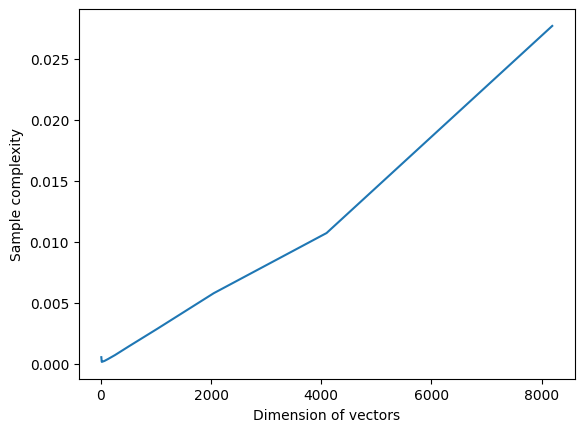

In [5]:
# plotting sample complexity

dimensions = [2**i for i in range(3,14)]
sample_comp  = []
for dimension in dimensions:
    sample_comp.append(sample_complexity(dimension))

plt.plot(dimensions,sample_comp)
plt.xlabel("Dimension of vectors")
plt.ylabel("Sample complexity")

plt.show()